Дисперсия: 6.186363636363981e-06
Отклонение: 0.0024872401645928727


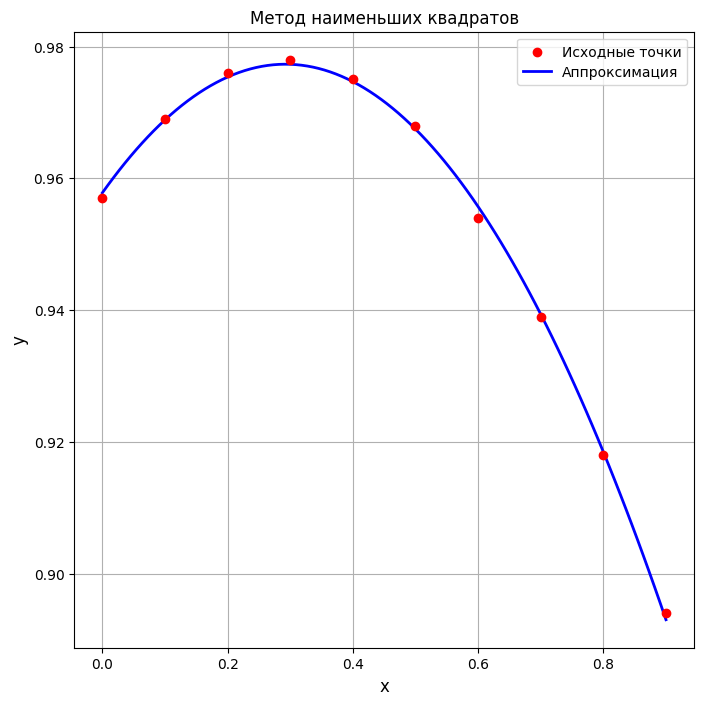

In [3]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt

from gaussian import GaussianSolver

def get_data() -> Tuple[np.ndarray, np.ndarray]:
    """Запрашивает у пользователя данные"""
    data_amont = int(input("Введите количество тестовых данных: "))

    x = np.zeros(data_amont, float)
    y = np.zeros(data_amont, float)
    for i in range(x.shape[0]):
        x[i] = input(f"Введите {i + 1}-ый x: ")
        y[i] = input(f"Введите {i + 1}-ый y: ")

    return x, y


def calc_dispersion(x: np.ndarray, y: np.ndarray, coeffs: np.ndarray) -> float:
    """Находит остаточную дисперсию"""
    calc_polinomial = GaussianSolver.get_polynomial_func(coeffs)
    temp_y = calc_polinomial(x)
    
    return np.sum((y - temp_y)**2) 


def calc_deviation(dispersion: float) -> float:
    """Находит среднее квадратичное отклонение"""
    return np.sqrt(dispersion)


def draw_approximating_func(x: np.ndarray, y: np.ndarray, coeffs: np.ndarray) -> None:
    """Рисует аппроксимированую функцию"""
    calc_polinomial = GaussianSolver.get_polynomial_func(coeffs)

    temp_x = np.linspace(min(x), max(x), 100)
    temp_y = calc_polinomial(temp_x)

    plt.figure(figsize=(8,8))

    plt.scatter(x, y, color="r", label="Исходные точки", zorder=3)
    plt.plot(temp_x, temp_y, color="b", linestyle="-", linewidth=2, label="Аппроксимация", zorder=2)

    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.title("Метод наименьших квадратов", fontsize=12)
    plt.legend()
    plt.grid()

    plt.show()


def main():
    # x, y = get_data()
    x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], float)
    y = np.array([0.957, 0.969, 0.976, 0.978, 0.975, 0.968, 0.954, 0.939, 0.918, 0.894], float)

    matrix, free_terms = GaussianSolver.build_polynomial(x, y, 2)
    coeffs = GaussianSolver.solve(matrix, free_terms)

    dispersion = calc_dispersion(x, y, coeffs)
    print(f"Дисперсия: {dispersion}")

    deviation = calc_deviation(dispersion)
    print(f"Отклонение: {deviation}")

    draw_approximating_func(x, y, coeffs)

if __name__ == "__main__":
    main()